In [ ]:
1+1

2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/modified_placement_data.csv')

In [ ]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         95 non-null     float64
 2   placement  95 non-null     object 
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


In [ ]:

# fix cgpa: replace comma with dot, convert to float, then int
df['cgpa'] = df['cgpa'].str.replace(',', '.').astype(float)
# convert placement: Yes -> 1, No -> 0
df['placement'] = df['placement'].map({'Yes': 1, 'No': 0})
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


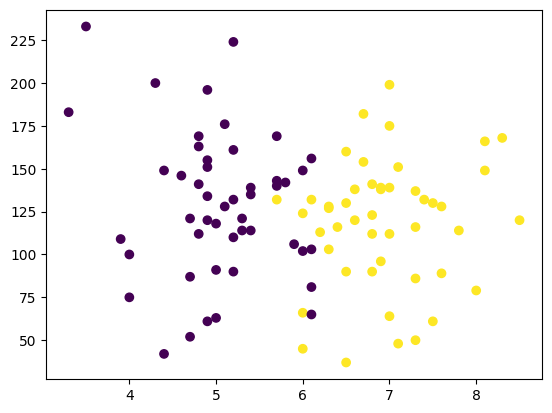

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
# Extract input and output
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
# split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
x_train.shape

(85, 2)

In [ ]:
x_test

,cgpa,iq
75,4.8,169.0
56,6.1,65.0
37,8.1,149.0
64,7.0,64.0
55,7.8,114.0
1,5.9,106.0
23,4.7,87.0
36,5.7,140.0
52,7.0,175.0
82,6.5,37.0


In [ ]:
# scaling data within range of -1 to +1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
# fit required only one time for each column
# after this it already fit on that range values

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
# train model
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# model prediction
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

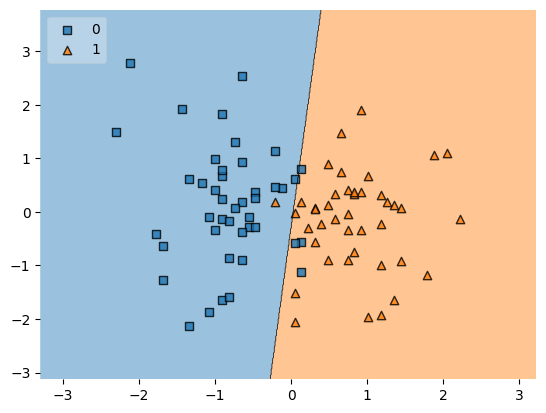

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
# convert object into files
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))